# CV and Transfer Learning

Q1. Import tensorflow (2.x Mandatory)

*   Import other required libraries

In [1]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


Q2. Load CIFAR10 dataset from keras and split into train and test
*    Identify shape of x_train and y_train

In [2]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data() #使用keras提供的api读取数据

num_classes = 10
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Using TensorFlow backend.


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Q3.

*   Transform x_train and x_test on scale of 0-1
*   Transform y_train and y_test to categories



[4]


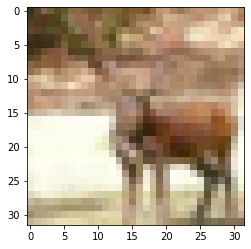

In [3]:
i=1001
plt.imshow(X_train[i])
print(y_train[i])
plt.ioff()

In [0]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [0]:
number_cat=10

In [0]:
import keras
y_train=keras.utils.to_categorical(y_train,number_cat)

In [0]:
X_train=X_train/255
X_test=X_test/255

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
Input_shape = X_train.shape[1:]

Q4. Import necessary packages required for Model building
*   Conv2D, Dense, Flatten, Dropout, MaxPooling2D etc.

In [0]:
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Q5. Prepare a CNN
 
*   Which will include above layers
*   Freely create your own Architecture and Arguments
*   Print Model Summary

In [0]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model = tf.keras.models.Sequential()


#Add Conv Layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#58X58X64

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#56X56X64

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#28X28X64

#Add Dropout
model.add(tf.keras.layers.Dropout(0.25))


#Add Conv Layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
#26X26X128


#Add Conv Layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
#24X24X128

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#12X12X128

#Add Dropout
model.add(tf.keras.layers.Dropout(0.25))

#Add Dense Layers after flattening the data
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))

model.add(tf.keras.layers.Dense(1024, activation='relu'))

#Add Dropout
model.add(tf.keras.layers.Dropout(0.25))

#Add Output Layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [0]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('cnn_cnn.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_acc', 
                                                    mode='max', 
                                                    verbose=1)

Q6. Train the CNN

*   Compile the model
*   Fit the model (10 epochs, 32 batch size)
*   Evaluate Model Performance

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train,y_train,batch_size=32,epochs=10,shuffle=True)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 488s 10ms/sample - loss: 1.5377 - accuracy: 0.4352
Epoch 2/10
50000/50000 [==============================] - 486s 10ms/sample - loss: 1.1270 - accuracy: 0.5988
Epoch 3/10
50000/50000 [==============================] - 485s 10ms/sample - loss: 0.9622 - accuracy: 0.6608
Epoch 4/10
50000/50000 [==============================] - 485s 10ms/sample - loss: 0.8509 - accuracy: 0.7028
Epoch 5/10
50000/50000 [==============================] - 485s 10ms/sample - loss: 0.7675 - accuracy: 0.7300
Epoch 6/10
50000/50000 [==============================] - 487s 10ms/sample - loss: 0.6996 - accuracy: 0.7526
Epoch 7/10
50000/50000 [==============================] - 487s 10ms/sample - loss: 0.6428 - accuracy: 0.7759
Epoch 8/10
50000/50000 [==============================] - 487s 10ms/sample - loss: 0.5962 - accuracy: 0.7912
Epoch 9/10
50000/50000 [==============================] - 490s 10ms/sample - loss: 0.5516 - accuracy: 0.8

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  1792      
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  73856     
_________________________________________________________________
conv2d_3 (Conv2D)            multiple                  147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0

In [24]:
evaluation=model.evaluate(X_test,y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

10000/10000 [==============================] - 21s 2ms/sample - loss: 453.8011 - accuracy: 0.0919
Test Accuracy: 0.09189999848604202


In [27]:
predicted_classes=model.predict_classes(X_test)
predicted_classes

array([3, 8, 8, ..., 5, 1, 7])

In [0]:
y_test=y_test.argmax(1)

In [29]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

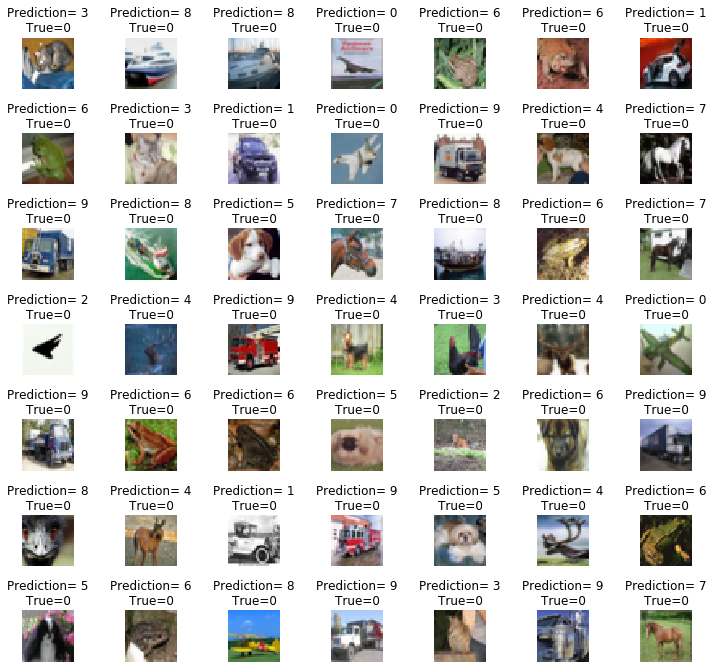

In [30]:
L=7
W=7
fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction= {}\nTrue={}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

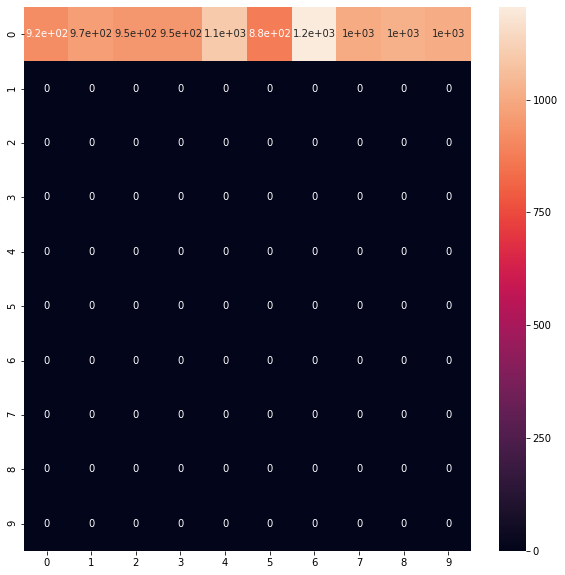

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm= confusion_matrix(y_test,predicted_classes)
cm
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)
plt.ioff()

Q7. Import packages required for VGG16

*   `tf.keras.application`
> VGG16, preprocess_input, decode_predictions
*   `tf.keras.preprocessing`
> load_img, img_to_array



In [0]:
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [0]:
#Define some parameters
img_size = 224
img_depth = 3

In [0]:
model = VGG16()

Q8. Load image


*   Mount Google Drive
*   Navigate to image location (use `os`)
*   Load image and assign a variable (use `load_img`)

In [37]:
from google.colab import drive
drive.mount('/content/drive')
#Load and resize this image
img = load_img('/content/drive/My Drive/49436743043_2441587ab9_c.jpg')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Q9. Preprocess the image


*   Convert image into array (use `img_to_array`)
*   Check shape of image
*   Reshape image into 4 dimensional format (use `reshape`)
*   Prepare the image for VGG16 (Use `preprocess_input()`)

In [0]:
#Prepare Input
model_input = img.resize((224,224))
model_input = img_to_array(model_input)
model_input = preprocess_input(model_input)
#model_input = (model_input - 127.5)/127.5
model_input = np.expand_dims(model_input, axis=0)


Q10. Predict the Class of image


*   Use `predict()` to calculate probabilities (Assign a variable)
*   Convert the probabilities to class labels (Use `decode_predictions`)(Assign a variable)
*   Print the classification results


> Use 
>*  label = label[0][0]
>*   print('%s (%.2f%%)' % (label[1], label[2]*100))
>*(where label is variable assigned for `decode_predictions` )



In [0]:
#Predict
prediction = model.predict(model_input)

In [40]:
prediction.shape

(1, 1000)

In [0]:
label = decode_predictions(prediction)

## Picture 1 Prediction

In [42]:
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

hummingbird (36.53%)


# Picture 2 Prediction

In [76]:
import zipfile
import io
from google.colab import files
uploaded = files.upload()
data = zipfile.ZipFile(io.BytesIO(uploaded['images.zip']), 'r')
data.extractall()

Saving images.zip to images.zip


In [79]:
!ls -l images

total 416
-rw-r--r-- 1 root root  59788 Feb  2 11:57 49436743043_2441587ab9_c.jpg
-rw-r--r-- 1 root root 115131 Feb  2 11:57 49438170746_8378201627_c.jpg
-rw-r--r-- 1 root root 169389 Feb  2 11:57 49441887332_107afa786d_c.jpg
-rw-r--r-- 1 root root  72853 Feb  2 11:57 4994221690_d070e8a355_c.jpg


In [104]:
import matplotlib.pyplot as plt
import os
import cv2
items = os.listdir('/content/images')
print (items)
for each_image in items:
  if each_image.endswith(".jpg"):
    full_path = "/content/images/" + each_image
    print (full_path)
    imga = cv2.imread(full_path)
    img = load_img(full_path)
    #Prepare Input
    model_input = img.resize((224,224))
    model_input = img_to_array(model_input)
    model_input = preprocess_input(model_input)
    #model_input = (model_input - 127.5)/127.5
    model_input = np.expand_dims(model_input, axis=0)
    #Predict
    prediction = model.predict(model_input)
    label = decode_predictions(prediction)
    label = label[0][0]
    print('%s (%.2f%%)' % (label[1], label[2]*100))

['49436743043_2441587ab9_c.jpg', '49441887332_107afa786d_c.jpg', '4994221690_d070e8a355_c.jpg', '49438170746_8378201627_c.jpg']
/content/images/49436743043_2441587ab9_c.jpg
hummingbird (36.53%)
/content/images/49441887332_107afa786d_c.jpg
monarch (99.72%)
/content/images/4994221690_d070e8a355_c.jpg
coffee_mug (75.90%)
/content/images/49438170746_8378201627_c.jpg
freight_car (34.34%)


#NLP

## Question 1

In [0]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Read file 'tweets.csv'

In [0]:
# reading the CSV file into pandas dataframe
tweets_df = pd.read_csv("/content/drive/My Drive/tweets.csv",encoding='unicode_escape')

**Drop null values**

*   Drop all the rows with null values




In [0]:
tweets_df.dropna(inplace=True)

In [50]:
tweets_df.shape

(3291, 3)

**Print the dataframe**
*   print initial 5 rows of the data


In [51]:
tweets_df.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


##Question 2

**Preprocess data**


*   convert all text to lowercase - use .lower()
*   select only numbers, alphabets, and #+_ from text - use re.sub()
*   strip all the text - use .strip() [To remove extra spaces]

In [0]:
import re

In [0]:
tweets_df=tweets_df.applymap(lambda s: s.lower())

In [0]:
tweets_df = tweets_df.applymap(lambda s: re.sub('[^0-9a-z #+_]','',s))
tweets_df = tweets_df.applymap(lambda s: s.strip())

In [55]:
tweets_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,negative emotion
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they ...,ipad,positive emotion
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa may...,google,positive emotion


## Question 3

**Preprocess data**


*   in column "is_there_an_emotion_directed_at_a_brand_or_product"
select only those rows where value equal to "positive emotion" or "negative emotion"
*   find the value counts of "positive emotion" and "negative emotion"





In [0]:
tweets_df=tweets_df[(tweets_df['is_there_an_emotion_directed_at_a_brand_or_product']=='positive emotion') | (tweets_df['is_there_an_emotion_directed_at_a_brand_or_product']=='negative emotion')]

In [59]:
tweets_df.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

positive emotion    2672
negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [60]:
tweets_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,negative emotion
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they ...,ipad,positive emotion
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa may...,google,positive emotion


##Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [0]:
tweets_df['is_there_an_emotion_directed_at_a_brand_or_product'] = tweets_df.is_there_an_emotion_directed_at_a_brand_or_product.map({'positive emotion':1, 'negative emotion':0})

## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [62]:
PredictColumn="is_there_an_emotion_directed_at_a_brand_or_product"
X=tweets_df['tweet_text']
X.shape

(3191,)

In [63]:
Y = tweets_df[PredictColumn]
Y.shape

(3191,)

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [0]:
# split the new DataFrame into training and testing sets [Default test size = 25%]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [0]:
vect = CountVectorizer(ngram_range=(1, 2),stop_words='english',min_df=2)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [67]:
# rows are documents, columns are terms (aka "tokens" or "features")
X_train_dtm.shape

(2393, 5434)

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [0]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)

### Fit the classifer
- fit logistic regression classifier

In [69]:
logreg.fit(X_train_dtm, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
# use Naive Bayes to predict the star rating
nb = MultinomialNB()

### Fit the classifer
- fit naive bayes classifier

In [71]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [0]:
y_pred_class1 = logreg.predict(X_test_dtm)

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [0]:
y_pred_class2 = nb.predict(X_test_dtm)

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [74]:
print(metrics.accuracy_score(y_test, y_pred_class1))

0.8446115288220551


### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [75]:
# calculate accuracy
print (metrics.accuracy_score(y_test, y_pred_class2))

0.8571428571428571
